In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from PIL import Image, ImageFile

In [9]:
# Mount Google Drive to access dataset
from google.colab import drive
drive.mount('/content/drive')

# Set up directory paths
base_dir = '/content/drive/MyDrive/Dataset Hasil Split 80-20_100x100_0'
h5_dir = '/content/drive/MyDrive/Capstone Project ML/CNN_Model2.h5'
train_dir = os.path.join(base_dir, 'training')
test_dir = os.path.join(base_dir, 'validation')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
# Load the pre-trained model from the .h5 file
model = tf.keras.models.load_model(h5_dir)

In [11]:
# Set up data generators for training and validation
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   brightness_range=(0.8,1.2),
                                   horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255,
                                 rotation_range=20,
                                 brightness_range=(0.8,1.2),
                                 horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(100, 100),
                                                    batch_size=16,
                                                    class_mode='categorical')

val_generator = val_datagen.flow_from_directory(test_dir,
                                                target_size=(100, 100),
                                                batch_size=16,
                                                class_mode='categorical')

Found 7008 images belonging to 5 classes.
Found 1756 images belonging to 5 classes.


In [12]:
# # Define the model
# model = Sequential()

# # Add convolutional layers
# model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(100, 100, 3)))
# model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
# model.add(MaxPooling2D((2, 2)))

# model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
# model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
# model.add(MaxPooling2D((2, 2)))

# model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
# model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
# model.add(MaxPooling2D((2, 2)))

# # Add fully connected layers
# model.add(Flatten())
# model.add(Dense(256, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(5, activation='softmax'))

In [13]:
# Compile the model
opt = Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# Set up checkpoint callback
checkpoint = ModelCheckpoint("CNN_Model4.h5", 
                             monitor='val_accuracy', 
                             verbose=1, 
                             save_best_only=True, 
                             mode='max')

In [14]:
# Train the model
history = model.fit(train_generator,
                    epochs=40,
                    validation_data=val_generator,
                    callbacks=[checkpoint])

Epoch 1/40
438/438 [==============================] - ETA: 0s - loss: 1.6030 - accuracy: 0.2306
Epoch 1: val_accuracy improved from -inf to 0.25399, saving model to CNN_Model4.h5
438/438 [==============================] - 763s 2s/step - loss: 1.6030 - accuracy: 0.2306 - val_loss: 1.5757 - val_accuracy: 0.2540
Epoch 2/40
438/438 [==============================] - ETA: 0s - loss: 1.5375 - accuracy: 0.2925
Epoch 2: val_accuracy improved from 0.25399 to 0.38610, saving model to CNN_Model4.h5
438/438 [==============================] - 646s 1s/step - loss: 1.5375 - accuracy: 0.2925 - val_loss: 1.4452 - val_accuracy: 0.3861
Epoch 3/40
438/438 [==============================] - ETA: 0s - loss: 1.4480 - accuracy: 0.3542
Epoch 3: val_accuracy improved from 0.38610 to 0.40945, saving model to CNN_Model4.h5
438/438 [==============================] - 687s 2s/step - loss: 1.4480 - accuracy: 0.3542 - val_loss: 1.3710 - val_accuracy: 0.4095
Epoch 4/40
438/438 [==============================] - ETA: 0s

In [15]:
# Re-evaluate the model
loss, acc = model.evaluate(val_generator, verbose=2)
print("Accuracy: {:5.2f}%".format(100 * acc))

110/110 - 41s - loss: 0.8663 - accuracy: 0.6669 - 41s/epoch - 373ms/step
Accuracy: 66.69%


In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

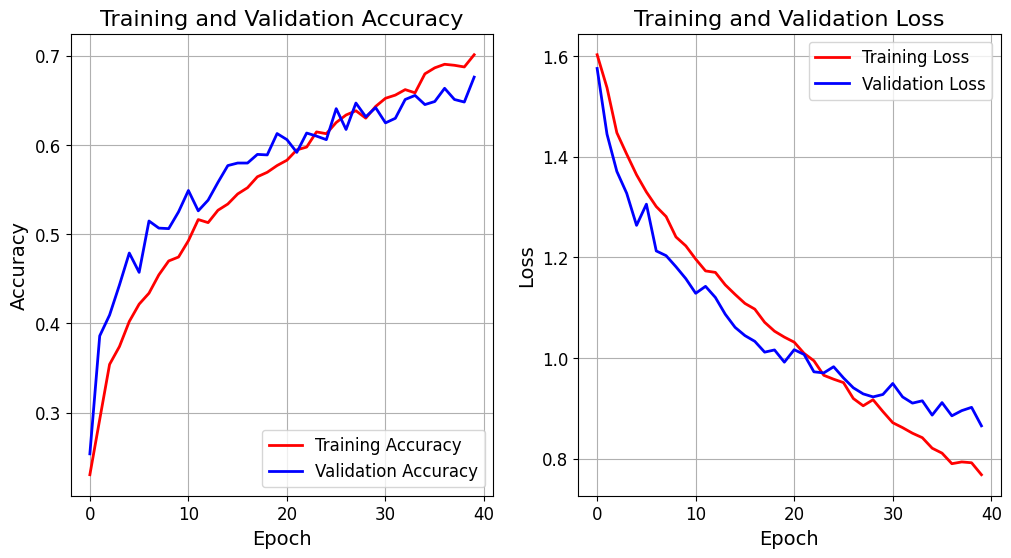

In [17]:
# Create a figure with two subplots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plotting accuracy
ax[0].plot(epochs, acc, 'r', linewidth=2, label='Training Accuracy')
ax[0].plot(epochs, val_acc, 'b', linewidth=2, label='Validation Accuracy')
ax[0].set_title('Training and Validation Accuracy', fontsize=16)
ax[0].set_xlabel('Epoch', fontsize=14)
ax[0].set_ylabel('Accuracy', fontsize=14)
ax[0].legend(loc='lower right', fontsize=12)
ax[0].grid()
ax[0].tick_params(axis='both', labelsize=12)

# Plotting loss
ax[1].plot(epochs, loss, 'r', linewidth=2, label='Training Loss')
ax[1].plot(epochs, val_loss, 'b', linewidth=2, label='Validation Loss')
ax[1].set_title('Training and Validation Loss', fontsize=16)
ax[1].set_xlabel('Epoch', fontsize=14)
ax[1].set_ylabel('Loss', fontsize=14)
ax[1].legend(loc='upper right', fontsize=12)
ax[1].grid()
ax[1].tick_params(axis='both', labelsize=12)

plt.show()

In [18]:
# Get the predicted labels for all images in the cross validation set
pred = model.predict(val_generator)
predicted_labels = np.argmax(pred, axis=1)

# Get the true labels for all images in the cross validation set
true_labels = val_generator.classes

# Get the filenames of the images in the cross validation set
filenames = val_generator.filenames

# Get the indices of the misclassified images
misclassified_indices = np.where(predicted_labels != true_labels)[0]

# Get the misclassified images and their true and predicted labels
misclassified_images = []
misclassified_true_labels = []
misclassified_predicted_labels = []

for i in misclassified_indices:
    misclassified_images.append(filenames[i])
    misclassified_true_labels.append(true_labels[i])
    misclassified_predicted_labels.append(predicted_labels[i])

# Print the misclassified images and their true and predicted labels
print("Misclassified Images:")
for i in range(len(misclassified_images)):
    print("Image:", misclassified_images[i], "True Label:", misclassified_true_labels[i], "Predicted Label:", misclassified_predicted_labels[i])

110/110 [==============================] - 43s 380ms/step
Misclassified Images:
Image: circle/1516903507277.jpeg True Label: 0 Predicted Label: 4
Image: circle/1530697046263.jpeg True Label: 0 Predicted Label: 4
Image: circle/1549435803931.jpeg True Label: 0 Predicted Label: 2
Image: circle/1592514976032.jpg True Label: 0 Predicted Label: 2
Image: circle/1594978747517.jpeg True Label: 0 Predicted Label: 3
Image: circle/1595514435993.jpeg True Label: 0 Predicted Label: 1
Image: circle/1596100379046.jpeg True Label: 0 Predicted Label: 1
Image: circle/1598269287923.jpeg True Label: 0 Predicted Label: 2
Image: circle/1613464161277.jpeg True Label: 0 Predicted Label: 1
Image: circle/1613551514899.jpeg True Label: 0 Predicted Label: 4
Image: circle/1617622064523.jpeg True Label: 0 Predicted Label: 4
Image: circle/1622455855394.jpeg True Label: 0 Predicted Label: 2
Image: circle/1631797469869.jpeg True Label: 0 Predicted Label: 2
Image: circle/1633528853156.jpeg True Label: 0 Predicted Label:

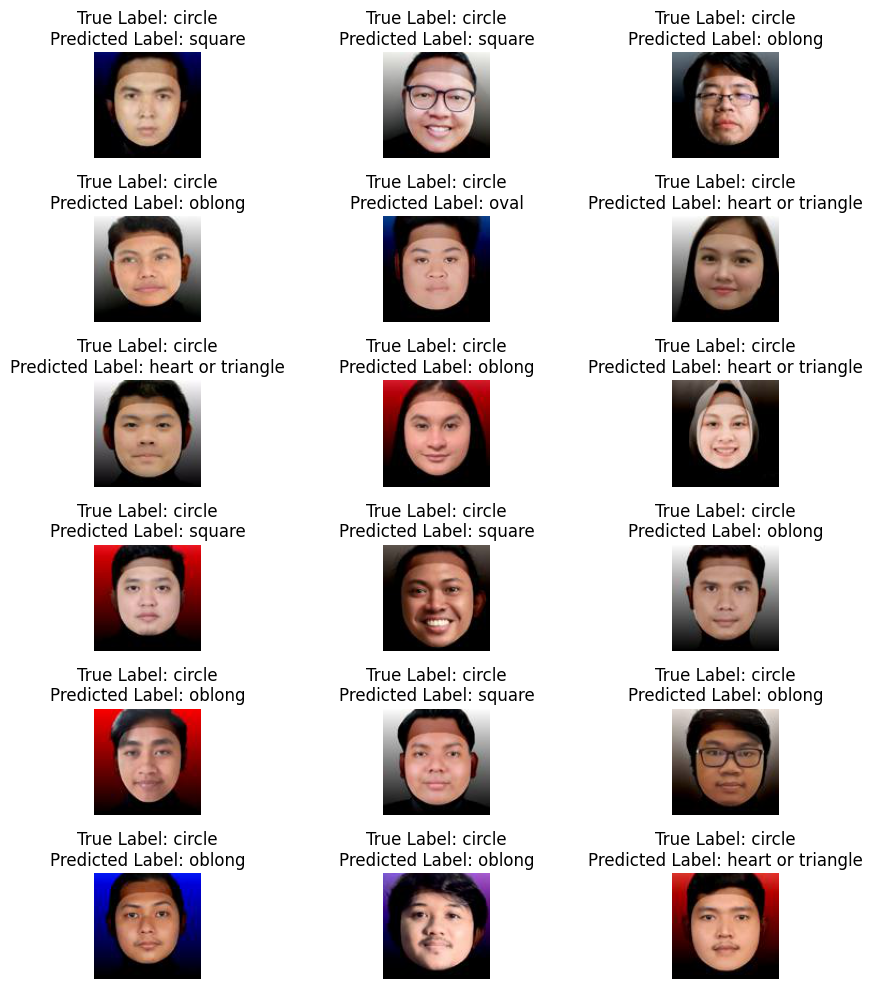

In [19]:
# Display some of the misclassified images
num_images_to_display = 18
fig, axes = plt.subplots(6, 3, figsize=(10, 10))
axes = axes.ravel()

# Map class indices to class names
class_names = {v: k for k, v in val_generator.class_indices.items()}

for i in range(num_images_to_display):
    img = Image.open(os.path.join(test_dir, misclassified_images[i]))
    true_label = class_names[misclassified_true_labels[i]]
    predicted_label = class_names[misclassified_predicted_labels[i]]
    axes[i].imshow(img)
    axes[i].set_title("True Label: {}\nPredicted Label: {}".format(true_label, predicted_label))
    axes[i].axis('off')
plt.tight_layout()
plt.show()